In [1]:
# 稳定展布——幂变换与水平对展布图
# 这里分作两步来稳定展布，第一步是构造logDf-logM图来找到合适的变换指数
# 上面的Df代表四分展布，M代表中位数

# 根据logdF-logM图找到合适的trans_index[这里是用OLS找斜率，一般不用那么严格，大致就可以]
get.trans.index <- function(data_raw){
    log_data_medains = c()
    log_data_iqrs = c()
    for(i in 1:length(data_raw)){
        log_data_medains = c(log_data_medains, log(median(data_raw[[i]])))
        log_data_iqrs = c(log_data_iqrs, log(IQR(data_raw[[i]])))
    }
    plot(log_data_medains, log_data_iqrs, main = "Log-Plot")
    fit <- lm(log_data_iqrs~log_data_medains)
    abline(fit)
    slope_b <- fit$coefficients[2]
    trans_index_p <- 1-slope_b
    return(as.double(trans_index_p))
}

In [2]:
# 根据计算得到的变换指数，进行数据变换，并分别构造变换前后的展布对水平图进行对比
get.spread.level <- function(data_raw, trans_index=1){
    
    # intput:data_raw[lis]t, trans_index[number]
    # output:
    
    # 如果不做变换，则只输出原始的展布对水平图
    if(trans_index==1){
        data_medains = c()
        data_iqrs = c()
        for(i in 1:length(data_raw)){
            data_medains = c(data_medains, median(data_raw[[i]]))
            data_iqrs = c(data_iqrs, IQR(data_raw[[i]]))
        }
        plot(data_medains, data_iqrs, sub="Original", main="Spread vs. Level",
             pch=23, col="red")
        result.list = list(medians=data_medains, iqrs=data_iqrs)
        return(result.list)
    }else{# 既有原始数据，又有变换后的数据
        data_medains = c()
        data_iqrs = c()
        for(i in 1:length(data_raw)){
            data_medains = c(data_medains, median(data_raw[[i]]))
            data_iqrs = c(data_iqrs, IQR(data_raw[[i]]))
        }
        par(mfrow=c(1,2))
        plot(data_medains, data_iqrs, main="Spread vs. Level", sub="Original", pch=23, col="red")
        
        # transeformed
        data_transed = data_raw
        for(i in 1:length(data_transed)){
            data_transed[[i]] = data_raw[[i]]^trans_index
        }
        
        data_medains_transed = c()
        data_iqrs_transed = c()
        for(i in 1:length(data_transed)){
            data_medains_transed = c(data_medains_transed, median(data_transed[[i]]))
            data_iqrs_transed = c(data_iqrs_transed, IQR(data_transed[[i]]))
        }
        plot(data_medains_transed, data_iqrs_transed, 
             main="Spread vs. Level", sub = "Transformed", pch=23, col="red")
        
        
        result.list = list(orig.medians=data_medains, orig.iqrs=data_iqrs,
                           trans.medians=data_medains_transed, trans.iqrs=data_iqrs_transed)
        return(result.list)
        
    }

}

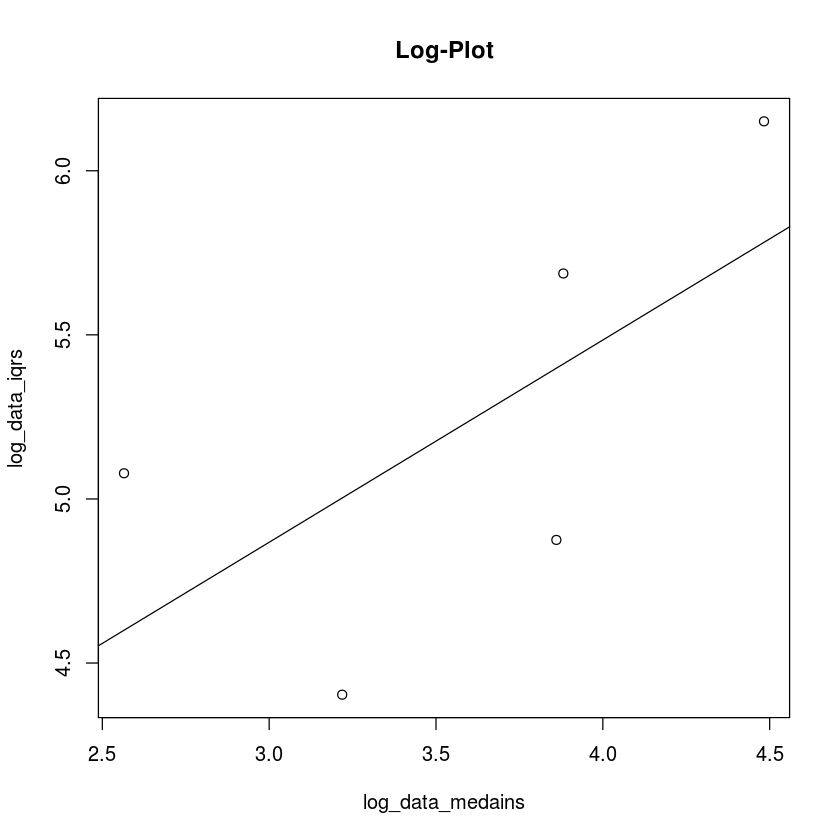

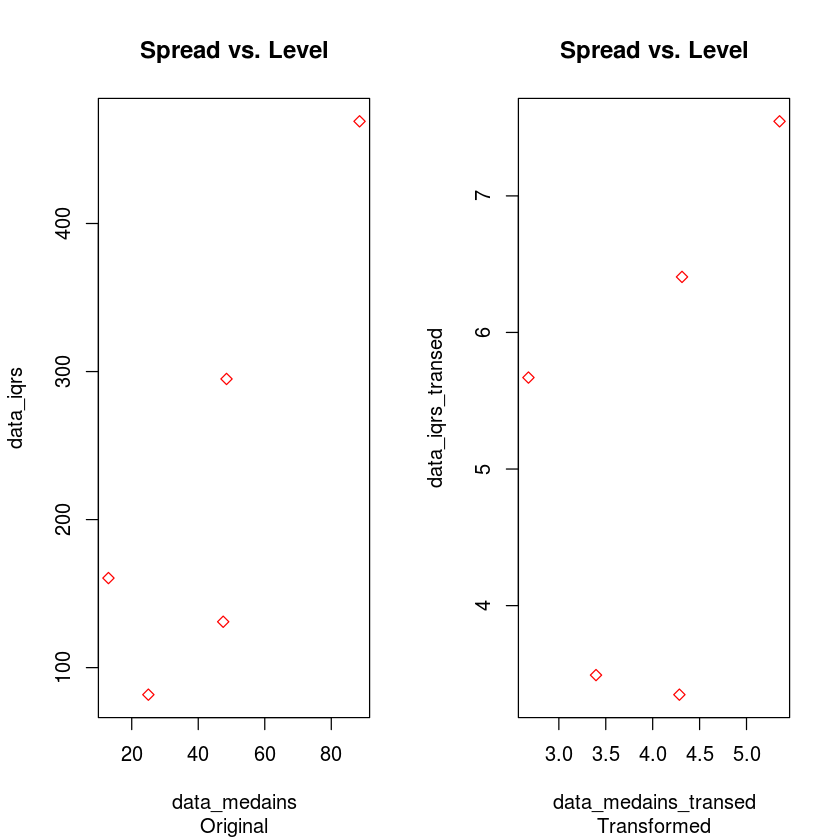

In [3]:
#　代入数据验证
l_2 <- c(1592, 533, 229, 71, 26, 11, 7, 1)
l_3 <- c(2398, 685, 242, 82, 24, 13, 9, 1, 2, 1, 1)
l_4 <- c(3696, 958, 328, 138, 39, 20, 6, 2)
l_5 <- c(532, 234, 100, 53, 33, 17, 6, 8, 4, 1)
l_6 <- c(397, 69, 26, 2)
data_raw <- list(l_2, l_3, l_4, l_5, l_6)

trans_index_p = get.trans.index(data_raw)
result <- get.spread.level(data_raw, trans_index_p)